Import what we all need package

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.3.1+cu121


### 1.Data (preparing and loading)

In [2]:
# Create "known" parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start = start, end = end, step = step).unsqueeze(dim=1) # Shape torch.Size([50, 1])
y = weight * X + bias

print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


#### split data into training and test sets  

   - Training set ~60-80%
   - Validation set ~10-20%
   - Testing set ~10-20%

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_prediction(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s = 4, label = "Testing data")
    
    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c = "r", s = 4, label="Predictions")
    
    plt.legend(prop = {"size": 14})

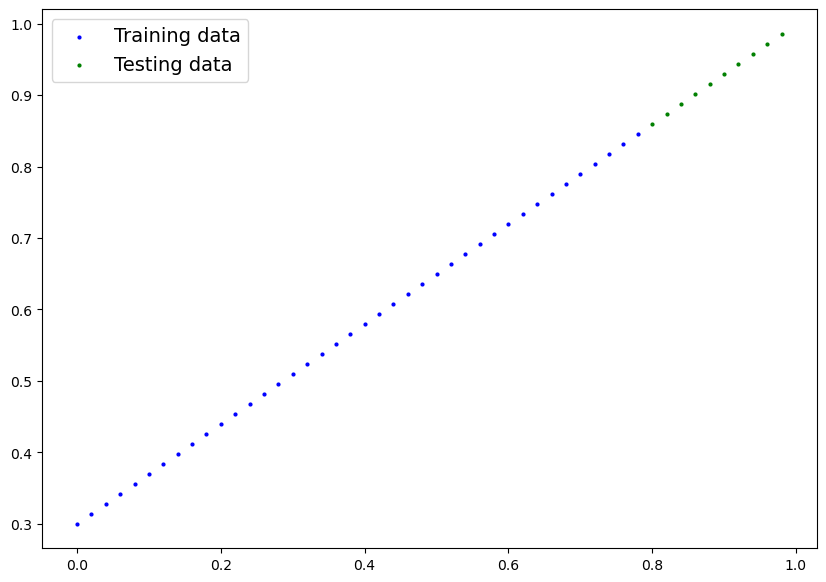

In [5]:
plot_prediction()

### 2. Build model

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    
    def forward(self, x):
        
        y = self.weights * x + self.bias
        return y

#### Checking the contents of a Pytorch model

In [7]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making predictions using `torch.inference_mode()`

In [9]:
# Make prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# same as with torch.no_grad():

In [10]:
print(f"Number of testing samples : {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values: \n {y_preds}")

Number of testing samples : 10
Number of predictions made: 10
Predicted values: 
 tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


visualize

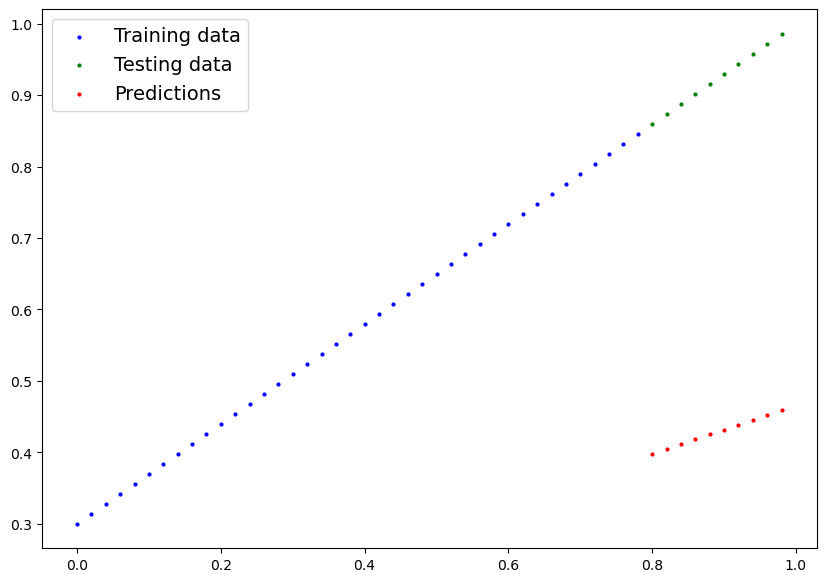

In [11]:
plot_prediction(predictions=y_preds)

### 3. Train Model

In [12]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [13]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAe Test Loss: {test_loss}")   
            

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAe Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAe Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAe Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAe Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAe Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAe Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAe Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAe Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAe Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAe Test Loss: 0.06473556160926819


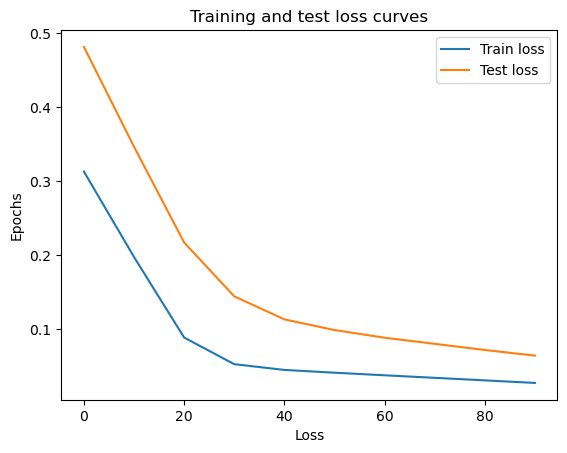

In [14]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend()

In [15]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias :")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"Weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias :
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
Weights: 0.7, bias: 0.3


### 4. Making predictions with a trained PyTorch model (inference)

In [16]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

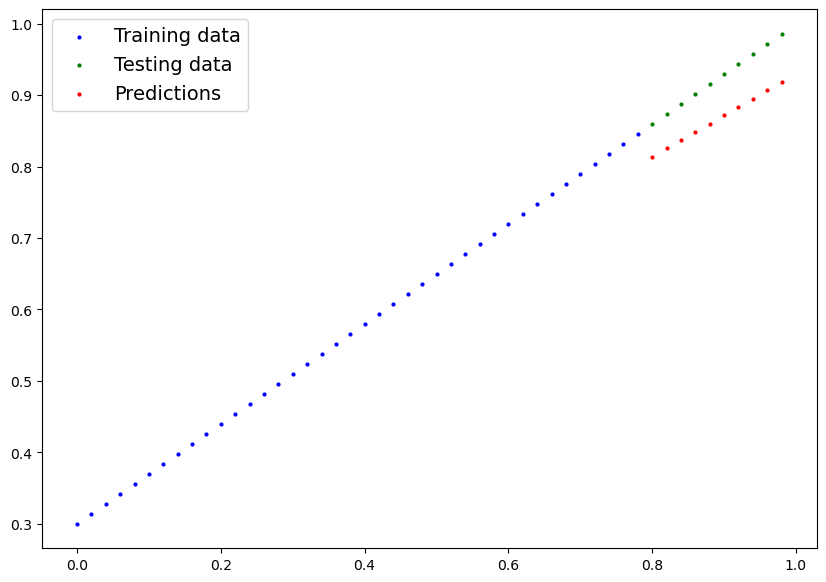

In [18]:
plot_prediction(predictions=y_preds)

### 5. Saving and loading a PyTorch model

In [19]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create models save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_0.pth


#### Load a saved PyTorch model's `state_dict()`

In [21]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
loaded_model_0.eval()

with torch.inference_mode():
    loader_model_preds = loaded_model_0(X_test)
    

In [24]:
y_preds == loader_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6.Putting it all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [21]:
# Create weights and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start = start, end = end, step=step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [22]:
# split data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

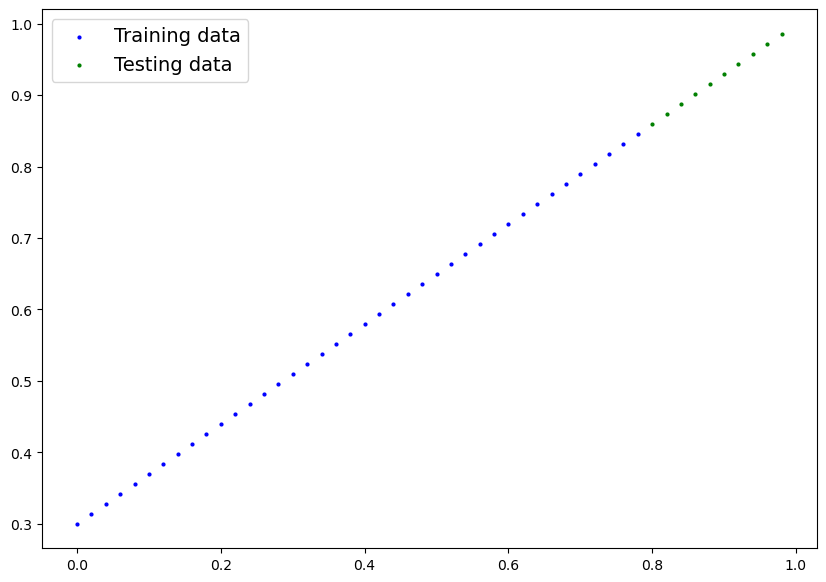

In [23]:
plot_prediction(X_train, y_train, X_test, y_test)

In [24]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        y = self.linear_layer(x)
        return y

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [25]:
next(model_1.parameters()).device

device(type='cpu')

In [26]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [27]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=1e-2)

In [28]:
torch.manual_seed(42)
epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    pred = model_1(X_train)
    loss = loss_func(pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_func(test_pred, y_test)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss {loss} | Test loss {test_loss}")
    

Epoch: 0 | Train loss 0.5551779866218567 | Test loss 0.5739762187004089
Epoch: 100 | Train loss 0.006215683650225401 | Test loss 0.014086711220443249
Epoch: 200 | Train loss 0.0012645035749301314 | Test loss 0.013801801018416882
Epoch: 300 | Train loss 0.0012645035749301314 | Test loss 0.013801801018416882
Epoch: 400 | Train loss 0.0012645035749301314 | Test loss 0.013801801018416882
Epoch: 500 | Train loss 0.0012645035749301314 | Test loss 0.013801801018416882
Epoch: 600 | Train loss 0.0012645035749301314 | Test loss 0.013801801018416882
Epoch: 700 | Train loss 0.0012645035749301314 | Test loss 0.013801801018416882
Epoch: 800 | Train loss 0.0012645035749301314 | Test loss 0.013801801018416882
Epoch: 900 | Train loss 0.0012645035749301314 | Test loss 0.013801801018416882


In [29]:
from pprint import pprint
print("The model learned the following values for weights and bias")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are: ")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are: 
weights: 0.7, bias: 0.3


In [30]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

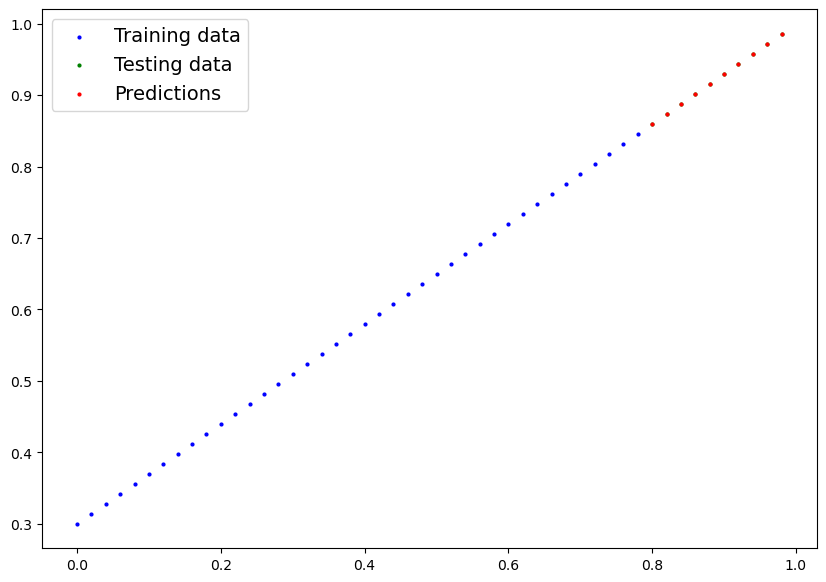

In [31]:
plot_prediction(predictions=y_preds.cpu())

In [32]:
from pathlib import Path

# 1.Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2.Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3.Save the model state dict
torch.save(model_1.state_dict(), f=MODEL_SAVE_PATH)
print(f"Saving model to {MODEL_SAVE_PATH}")

Saving model to models\01_pytorch_workflow_model_1.pth


In [33]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"Loaded model :\n{loaded_model_1}")
print(f"Model on device:\n {next(loaded_model_1.parameters()).device}")

Loaded model :
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
 cuda:0


In [34]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')